# Notebook Content

    0. Importing Libraries
    1. Data Cleaning
    2. Creating a Subset of the Dataframe
    3. Data Preperation for Regression Analysis
    4. Regression Analysis for Experience Level
    5. Regression Analysis for Experience Level (without the extreme values)
  

# 0. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import sklearn
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression     
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.linear_model import LinearRegression

In [2]:
# Ensure that the graphs are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Import Data
df = pd.read_csv('/Users/buketoztekin/Documents/Cleaned_Salaries_Data.csv')

In [4]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Analytics Engineer,59615,CA,100,CA,S
1,2024,SE,FT,AI Developer,252000,US,0,US,M
2,2024,SE,FT,AI Developer,168000,US,0,US,M
3,2024,MI,FT,Data Scientist,199500,US,100,US,M
4,2024,MI,FT,Data Scientist,86700,US,100,US,M
...,...,...,...,...,...,...,...,...,...
10653,2020,SE,FT,Data Scientist,412000,US,100,US,L
10654,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
10655,2020,EN,FT,Data Scientist,105000,US,100,US,S
10656,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


# 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10658 entries, 0 to 10657
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           10658 non-null  int64 
 1   experience_level    10658 non-null  object
 2   employment_type     10658 non-null  object
 3   job_title           10658 non-null  object
 4   salary_in_usd       10658 non-null  int64 
 5   employee_residence  10658 non-null  object
 6   remote_ratio        10658 non-null  int64 
 7   company_location    10658 non-null  object
 8   company_size        10658 non-null  object
dtypes: int64(3), object(6)
memory usage: 749.5+ KB


In [6]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
dups = df.duplicated()

In [8]:
dups.shape #No duplicates

(10658,)

# 2. Creating a Subset of the Dataframe

#### Since most of the data comes from the USA, and there are differences in salary expectations across countries, I will create a subset of the data for the USA and perform my analysis on that subset only.

In [9]:
# Create a subset where company_location is 'United States'
usa_subset = df[df['company_location'] == 'US']

# Check the first few rows of the subset to ensure it worked
print(usa_subset.head())

   work_year experience_level employment_type          job_title  \
1       2024               SE              FT       AI Developer   
2       2024               SE              FT       AI Developer   
3       2024               MI              FT     Data Scientist   
4       2024               MI              FT     Data Scientist   
5       2024               SE              FT  Research Engineer   

   salary_in_usd employee_residence  remote_ratio company_location  \
1         252000                 US             0               US   
2         168000                 US             0               US   
3         199500                 US           100               US   
4          86700                 US           100               US   
5         180000                 US             0               US   

  company_size  
1            M  
2            M  
3            M  
4            M  
5            S  


In [10]:
# Check the value counts of 'employment_type' in the USA subset
employment_type_counts = usa_subset['employment_type'].value_counts()

# Display the result
print(employment_type_counts)


employment_type
FT    8812
PT      26
CT      21
FL       4
Name: count, dtype: int64


#### Since the majority of the employment data (over 98%) in the USA subset represents Full-Time (FT) employees (8,812 out of 8,863 records), it makes sense to focus the analysis on this category. The other employment types (Part-Time, Contractor, and Freelancer) have significantly fewer records, making it difficult to draw meaningful conclusions from those groups. By creating a subset of Full-Time employees, we can ensure that the analysis is based on a large and representative sample.

In [11]:
# Create a subset for Full-Time (FT) employees
usa_ft_subset = usa_subset[usa_subset['employment_type'] == 'FT']

# Check the size of the new subset
print("Number of Full-Time (FT) employees:", len(usa_ft_subset))

# Display the first few rows of the subset to verify
usa_ft_subset.head()

Number of Full-Time (FT) employees: 8812


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2024,SE,FT,AI Developer,252000,US,0,US,M
2,2024,SE,FT,AI Developer,168000,US,0,US,M
3,2024,MI,FT,Data Scientist,199500,US,100,US,M
4,2024,MI,FT,Data Scientist,86700,US,100,US,M
5,2024,SE,FT,Research Engineer,180000,US,0,US,S


/var/folders/3_/dyc73j694fb41h6xln2l5_rc0000gn/T/ipykernel_32762/3985437733.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(usa_ft_subset['salary_in_usd'], bins=25) # Shows extreme values
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='salary_in_usd', ylabel='Density'>

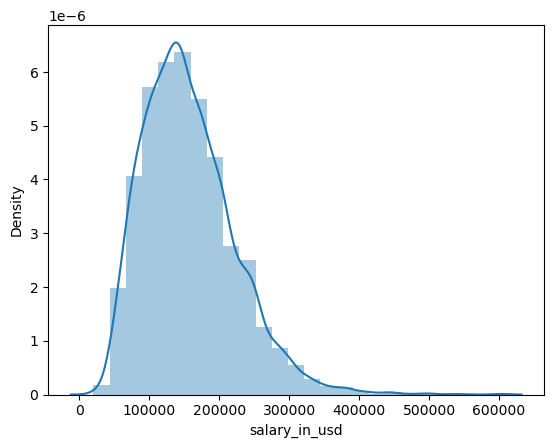

In [12]:
sns.distplot(usa_ft_subset['salary_in_usd'], bins=25) # Shows extreme values

#### Although there are some extreme values in the salary data, they will be retained for now to avoid altering the overall dataset.

In [13]:
usa_ft_subset['salary_in_usd'].describe()

count      8812.000000
mean     156672.383908
std       66196.995714
min       20000.000000
25%      108737.500000
50%      147800.000000
75%      195000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

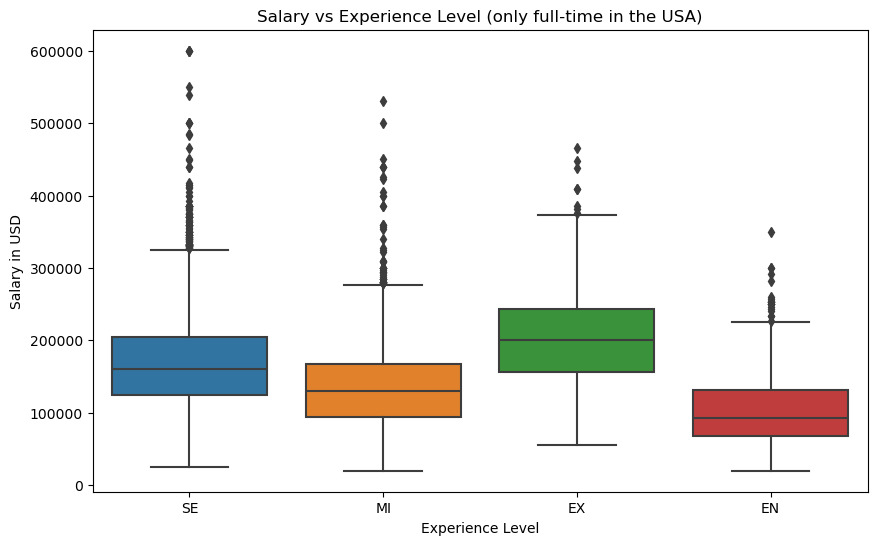

In [14]:
# Create the categorical plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=usa_ft_subset)

# Add labels and title
plt.title('Salary vs Experience Level (only full-time in the USA)')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

### Hypothesis: If the experience level is higher, the employee is more likely to have a higher salary

# 3. Data preperation for regression analysis (experience level and salary)

First, we need to map the experience_level column, as it is a categorical variable that must be converted to numerical values for analysis.

In [15]:
# Check the unique values in the 'experience_level' column
print(usa_ft_subset['experience_level'].unique())

['SE' 'MI' 'EX' 'EN']


In [16]:
# Map the experience levels to numerical values
experience_mapping = {
    'EN': 0,
    'MI': 1,
    'SE': 2,
    'EX': 3
}

# Apply the mapping
usa_ft_subset['experience_level_encoded'] = usa_ft_subset['experience_level'].map(experience_mapping)

# Check the result
print(usa_ft_subset[['experience_level', 'experience_level_encoded']].head())

  experience_level  experience_level_encoded
1               SE                         2
2               SE                         2
3               MI                         1
4               MI                         1
5               SE                         2


/var/folders/3_/dyc73j694fb41h6xln2l5_rc0000gn/T/ipykernel_32762/812926447.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_ft_subset['experience_level_encoded'] = usa_ft_subset['experience_level'].map(experience_mapping)


In [17]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_experience = usa_ft_subset['experience_level_encoded'].values.reshape(-1,1)
y_salary = usa_ft_subset['salary_in_usd'].values.reshape(-1,1)

In [18]:
X_experience

array([[2],
       [2],
       [1],
       ...,
       [2],
       [1],
       [0]])

In [19]:
y_salary

array([[252000],
       [168000],
       [199500],
       ...,
       [412000],
       [151000],
       [105000]])

In [20]:
# Split data for Experience Level vs Salary
X_experience_train, X_experience_test, y_salary_train, y_salary_test = train_test_split(
    X_experience, y_salary, test_size=0.3, random_state=0)

# Check the shape of the splits
print(X_experience_train.shape, X_experience_test.shape)

(6168, 1) (2644, 1)


# 4. Regression Analysis for Experience Level

In [21]:
# Create a regression object.

regression = LinearRegression()

In [22]:
# Fit the regression object onto the training set.

regression.fit(X_experience_train, y_salary_train)

LinearRegression()

In [23]:
# Predict the values of y using X.

y_salary_predicted = regression.predict(X_experience_test)

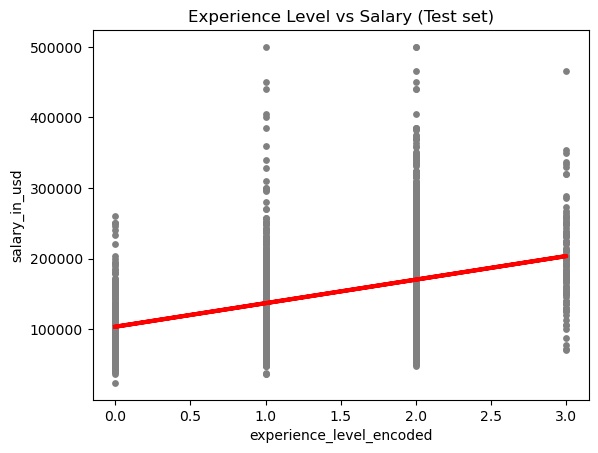

In [24]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_experience_test, y_salary_test, color='gray', s = 15)
plot_test.plot(X_experience_test, y_salary_predicted, color='red', linewidth =3)
plot_test.title('Experience Level vs Salary (Test set)')
plot_test.xlabel('experience_level_encoded')
plot_test.ylabel('salary_in_usd')
plot_test.show()

In [25]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_salary_test, y_salary_predicted) # This is the mean squared error
r2 = r2_score(y_salary_test, y_salary_predicted) # This is the R2 score. 

In [26]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[33361.43225291]]
Mean squared error:  3848689403.949996
R2 score:  0.11961032795968984


The slope shows that higher experience levels are associated with higher salaries, with each level increasing salary by about $33,361.

The MSE suggests there's a noticeable error in the predictions, and the low R² score indicates that experience level alone explains only a small portion (11%) of salary variation.

# 5. Regression Analysis without the Extreme Values

Let's see if the model is going to improve after removing the extreme salary values.

### Removing the extreme salary values

In [27]:
# Given values
mean_salary = 156672.383908
std_salary = 66196.995714

# Define the threshold for extreme values (mean ± 2 * standard deviation)
upper_threshold = mean_salary + 2 * std_salary
lower_threshold = mean_salary - 2 * std_salary

print("Upper Threshold (mean + 2*std):", upper_threshold)
print("Lower Threshold (mean - 2*std):", lower_threshold)


Upper Threshold (mean + 2*std): 289066.375336
Lower Threshold (mean - 2*std): 24278.39247999998


In [28]:
# Remove the extreme salary values based on the thresholds
usa_ft_subset_filtered = usa_ft_subset[(usa_ft_subset['salary_in_usd'] <= 289066.375336) & 
                                (usa_ft_subset['salary_in_usd'] >= 24278.39247999998)]

# Check the size of the cleaned dataset
print("Original Size:", len(usa_ft_subset))
print("Cleaned Size:", len(usa_ft_subset_filtered))

Original Size: 8812
Cleaned Size: 8482


/var/folders/3_/dyc73j694fb41h6xln2l5_rc0000gn/T/ipykernel_32762/1803589316.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(usa_ft_subset_filtered['salary_in_usd'], bins=25)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='salary_in_usd', ylabel='Density'>

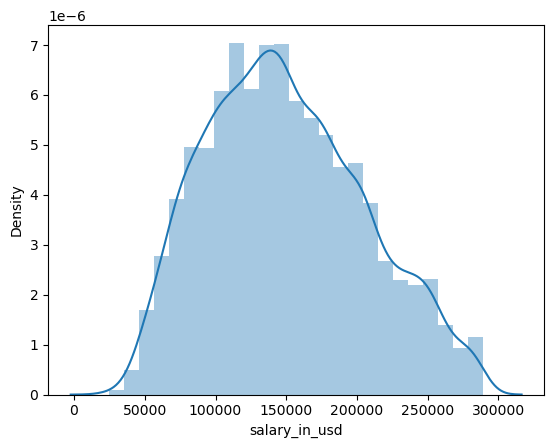

In [29]:
sns.distplot(usa_ft_subset_filtered['salary_in_usd'], bins=25)

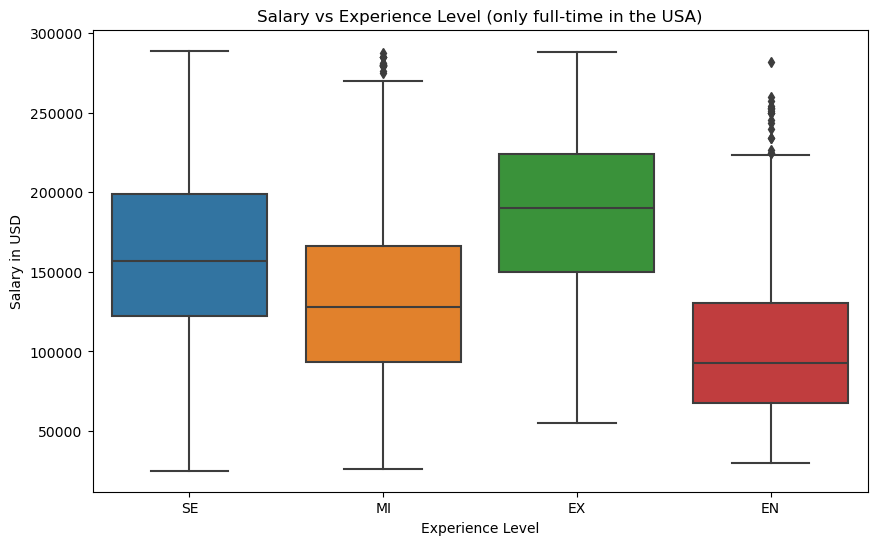

In [30]:
# Create the categorical plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=usa_ft_subset_filtered)

# Add labels and title
plt.title('Salary vs Experience Level (only full-time in the USA)')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

#### Salaries are normally distributed without the extreme values

In [31]:
# Map the experience levels to numerical values
experience_mapping = {
    'EN': 0,
    'MI': 1,
    'SE': 2,
    'EX': 3
}

# Apply the mapping
usa_ft_subset_filtered['experience_level_encoded'] = usa_ft_subset_filtered['experience_level'].map(experience_mapping)

# Check the result
print(usa_ft_subset_filtered[['experience_level', 'experience_level_encoded']].head())

  experience_level  experience_level_encoded
1               SE                         2
2               SE                         2
3               MI                         1
4               MI                         1
5               SE                         2


/var/folders/3_/dyc73j694fb41h6xln2l5_rc0000gn/T/ipykernel_32762/3804635757.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_ft_subset_filtered['experience_level_encoded'] = usa_ft_subset_filtered['experience_level'].map(experience_mapping)


In [32]:
usa_ft_subset_filtered.shape

(8482, 10)

In [33]:
usa_ft_subset_filtered.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_encoded
1,2024,SE,FT,AI Developer,252000,US,0,US,M,2
2,2024,SE,FT,AI Developer,168000,US,0,US,M,2
3,2024,MI,FT,Data Scientist,199500,US,100,US,M,1
4,2024,MI,FT,Data Scientist,86700,US,100,US,M,1
5,2024,SE,FT,Research Engineer,180000,US,0,US,S,2


## Preparing the data for regression analysis (without extreme values)

In [34]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_experience2 = usa_ft_subset_filtered['experience_level_encoded'].values.reshape(-1,1)
y_salary2 = usa_ft_subset_filtered['salary_in_usd'].values.reshape(-1,1)

In [35]:
# Split data for Experience Level vs Salary
X_experience2_train, X_experience2_test, y_salary2_train, y_salary2_test = train_test_split(
    X_experience2, y_salary2, test_size=0.3, random_state=0)

# Check the shape of the splits
print(X_experience2_train.shape, X_experience2_test.shape)

(5937, 1) (2545, 1)


In [36]:
# Create a regression object.

regression = LinearRegression()

In [37]:
# Fit the regression model on the new training data
regression.fit(X_experience2_train, y_salary2_train)

LinearRegression()

In [38]:
# Predict the values of y using X.

y_predicted_experience2 = regression.predict(X_experience2_test)

## Regression Analysis for Experience Level and Salary (without the extreme values)

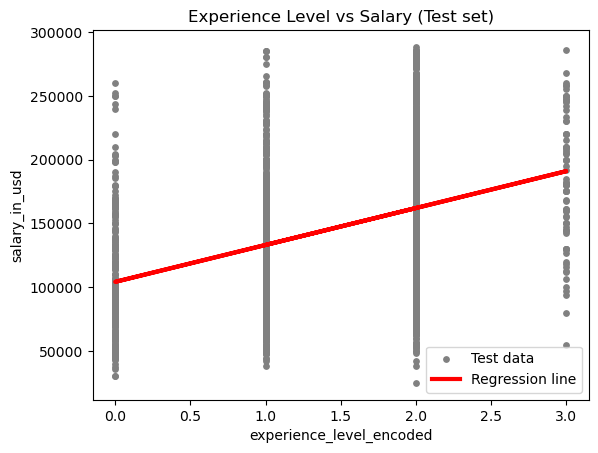

In [39]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_experience2_test, y_salary2_test, color='gray', s=15, label='Test data')

# Plot the regression line based on the test set predictions
plot_test.plot(X_experience2_test, y_predicted_experience2, color='red', linewidth=3, label='Regression line')

# Add labels and title
plot_test.title('Experience Level vs Salary (Test set)')
plot_test.xlabel('experience_level_encoded')
plot_test.ylabel('salary_in_usd')
plot_test.legend()

# Display the plot
plot_test.show()

In [40]:
# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_salary2_test, y_predicted_experience2)
rmse = np.sqrt(mse)  # Root Mean Squared Error

# Calculate R² score
r2 = r2_score(y_salary2_test, y_predicted_experience2)

In [41]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope (Coefficient):', regression.coef_)
print('Root Mean Squared Error (RMSE):', rmse)
print('R² Score:', r2)

Slope (Coefficient): [[28923.41724431]]
Root Mean Squared Error (RMSE): 52219.930414599716
R² Score: 0.12352778577123436


In [42]:
# Create a DataFrame to compare the actual and predicted values
data_compare_experience = pd.DataFrame({
    'Actual': y_salary2_test.flatten(),   # Actual values (flatten if needed)
    'Predicted': y_predicted_experience2.flatten()  # Predicted values (flatten if needed)
})

# Display the first 30 rows of the comparison
data_compare_experience.head(30)

,Actual,Predicted
0,224000,161961.377177
1,130000,161961.377177
2,117000,133037.959933
3,50000,161961.377177
4,210550,161961.377177
5,149076,161961.377177
6,166400,161961.377177
7,120000,133037.959933
8,128000,133037.959933
9,94625,133037.959933


After removing the outliers, the model still did not show a significant improvement. The slope shows that higher experience levels are associated with higher salaries, with an increase of around $29,000 for each level up. The RMSE indicates a significant error in salary predictions, suggesting the model is not very precise. The R² score shows that experience level alone doesn't explain much of the salary variation, meaning additional factors need to be considered for a more accurate model.

# 6. Exporting dataframes

In [43]:
#Export the new dataframes
usa_ft_subset.to_csv('/Users/buketoztekin/Documents/usa_ft_subset.csv', index=False)
usa_ft_subset_filtered.to_csv('/Users/buketoztekin/Documents/usa_ft_subset_filtered.csv', index=False)